## 1. About the DWD Open Data Portal 

The data of the Climate Data Center (CDC) of the DWD (Deutscher Wetterdienst, German Weather Service) is provided on an **FTP server**. <br> **FTP** stands for _File Transfer Protocol_.

Open the FTP link ftp://opendata.dwd.de/climate_environment/CDC/ in your browser (copy-paste) and find our how it is structured hierarchically.

You can also open the link with **HTTPS** (Hypertext Transfer Protocol Secure): https://opendata.dwd.de/climate_environment/CDC/

We are interested in downloading the metadata of annual temperature to get information related to their stations

In [1]:
import requests
from bs4 import BeautifulSoup
import os
import re # to use regex expressions 
import tqdm
import pandas as pd

# URL of the DWD website
url_base = "https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/"
url_temporal_resolution = "annual/"
url_parameter = "kl/"
url_subdir = "historical/"
url_full = os.path.join(url_base, url_temporal_resolution, url_parameter, url_subdir)

# Directory to save the downloaded files
download_dir = "../data/original/dwd/" +  url_temporal_resolution + url_parameter + url_subdir

# Create the directory if it doesn't exist
if not os.path.exists(download_dir):
    os.makedirs(download_dir)

print("download dir: ", download_dir)

download dir:  ../data/original/dwd/annual/kl/historical/


In [2]:
url_full

'https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/annual/kl/historical/'

In [8]:
def grab_file(file_url, download_dir):
        # get only the file name from the full url
        file_name = file_url.split("/")[-1]
        # Download the file
        file_path =os.path.join(download_dir, file_name)
        with open(file_path, "wb") as file:
            file.write(requests.get(file_url).content)
        
    

In [9]:
# Send an HTTP request to the URL
response = requests.get(url_full)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, "html.parser")
    # Look for the metadata file
    links = soup.find_all(href=re.compile("Beschreibung"))
    # Take the url of the file
    file_name = links[0].get("href")
    # Download the file
    grab_file(os.path.join(url_full, file_name), download_dir)
    print(f"Downloaded: {download_dir+file_name}")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

Downloaded: ../data/original/dwd/annual/kl/historical/KL_Jahreswerte_Beschreibung_Stationen.txt


In [10]:
# get station path
file_path = os.path.join(download_dir,file_name)
# read the header of the file
header = open(file_path, encoding="latin").readline().split()
header

['Stations_id',
 'von_datum',
 'bis_datum',
 'Stationshoehe',
 'geoBreite',
 'geoLaenge',
 'Stationsname',
 'Bundesland']

In [13]:
print("." , file_path)

. ../data/original/dwd/annual/kl/historical/KL_Jahreswerte_Beschreibung_Stationen.txt


In [11]:
# translation dictionary
translate = \
{'Stations_id':'station_id',
 'von_datum':'date_from',
 'bis_datum':'date_to',
 'Stationshoehe':'altitude',
 'geoBreite': 'latitude',
 'geoLaenge': 'longitude',
 'Stationsname':'name',
 'Bundesland':'state'}

In [12]:
#pd.read_csv?

# Exercise:
notice that stations_id is originally a string, however if you read the data as the default format you will lose the leading zeros from the code.
- Check the documentation of pd.read_csv.
- Figure out how to correctly read the data. Focus on:
    - skiprows
    - names
    - encoding
    - parse_dates
    - dtype

In [8]:
df_stations_2 = pd.read_fwf(file_path,
                          skiprows=[0,1],
                          names=translate,
                          encoding="latin", 
                          parse_dates=["von_datum","bis_datum"],
                          dtype={"Stations_id":str}
                          #index_col="Stations_id"
                         )
df_stations_2

,Stations_id,von_datum,bis_datum,Stationshoehe,geoBreite,geoLaenge,Stationsname,Bundesland
0,00001,1931-01-01,1986-06-30,478,47.8413,8.8493,Aach,Baden-Württemberg
1,00003,1851-01-01,2011-03-31,202,50.7827,6.0941,Aachen,Nordrhein-Westfalen
2,00044,1971-03-01,2023-12-31,44,52.9336,8.2370,Großenkneten,Niedersachsen
3,00052,1973-01-01,2001-12-31,46,53.6623,10.1990,Ahrensburg-Wulfsdorf,Schleswig-Holstein
4,00061,1975-07-01,1978-08-31,339,48.8443,12.6171,Aiterhofen,Bayern
...,...,...,...,...,...,...,...,...
1192,19631,1881-06-01,1969-12-31,268,50.8083,10.2294,Salzungen,Thüringen
1193,19647,1951-01-01,2005-10-31,178,49.4547,8.9794,Eberbach/Neckar,Baden-Württemberg
1194,19774,1971-08-19,1994-02-28,174,51.4814,10.8057,Nordhausen (Umspannwerk),Thüringen
1195,19781,1881-01-01,1953-12-31,367,48.7429,11.4233,Ingolstadt,Bayern


In [9]:
# read the stations dataframe # solution is in the cell

df_stations = pd.read_fwf(file_path,
                          skiprows=2,
                          names=header,
                          encoding="latin", 
                          parse_dates=["von_datum","bis_datum"],
                          dtype={"Stations_id":str}
                          #index_col="Stations_id"
                         )
df_stations

,Stations_id,von_datum,bis_datum,Stationshoehe,geoBreite,geoLaenge,Stationsname,Bundesland
0,00001,1931-01-01,1986-06-30,478,47.8413,8.8493,Aach,Baden-Württemberg
1,00003,1851-01-01,2011-03-31,202,50.7827,6.0941,Aachen,Nordrhein-Westfalen
2,00044,1971-03-01,2023-12-31,44,52.9336,8.2370,Großenkneten,Niedersachsen
3,00052,1973-01-01,2001-12-31,46,53.6623,10.1990,Ahrensburg-Wulfsdorf,Schleswig-Holstein
4,00061,1975-07-01,1978-08-31,339,48.8443,12.6171,Aiterhofen,Bayern
...,...,...,...,...,...,...,...,...
1192,19631,1881-06-01,1969-12-31,268,50.8083,10.2294,Salzungen,Thüringen
1193,19647,1951-01-01,2005-10-31,178,49.4547,8.9794,Eberbach/Neckar,Baden-Württemberg
1194,19774,1971-08-19,1994-02-28,174,51.4814,10.8057,Nordhausen (Umspannwerk),Thüringen
1195,19781,1881-01-01,1953-12-31,367,48.7429,11.4233,Ingolstadt,Bayern


# Exercise:
Check all the different values in the "state" column. You can use the function <code>.unique()</code> for this.

In [10]:
df_stations.rename(columns=translate,inplace=True)

In [11]:
df_stations.loc[:,"state"].unique()

array(['Baden-Württemberg', 'Nordrhein-Westfalen', 'Niedersachsen',
       'Schleswig-Holstein', 'Bayern', 'Hessen', 'Brandenburg',
       'Thüringen', 'Mecklenburg-Vorpommern', 'Sachsen',
       'Rheinland-Pfalz', 'Sachsen-Anhalt', 'Berlin', 'Saarland',
       'Bremen', 'Hamburg'], dtype=object)

# Exercise:
Select only stations in NRW (you know how it is spelled from the previous exercise) which are still active (date_to is later than 2022) and which starting recording information at least in 1950.
**Hint:** On Pandas documentation, look for Dataframe.query()

In [12]:
#df_stations.query?

In [13]:
# filter stations only in NRW which are active and older than 1950
df_stations_short = df_stations.query("state == 'Nordrhein-Westfalen' and date_to >= 2022 and date_from <= 1950")

In [14]:
# df_stations.query?    REALLY USE THE ???? AND LOOK CLOSELY AT THE EXAPLES IN THERE

df_stations_short

,station_id,date_from,date_to,altitude,latitude,longitude,name,state
114,00555,1925-01-01,2023-12-31,110,51.5026,7.2289,Bochum,Nordrhein-Westfalen
220,01078,1940-01-01,2023-12-31,37,51.2960,6.7686,Düsseldorf,Nordrhein-Westfalen
265,01300,1931-01-01,2023-12-31,351,51.2540,8.1565,Eslohe,Nordrhein-Westfalen
266,01303,1888-01-01,2023-12-31,150,51.4041,6.9677,Essen-Bredeney,Nordrhein-Westfalen
267,01327,1937-01-01,2023-12-31,147,50.7119,6.7905,Weilerswist-Lommersum,Nordrhein-Westfalen
319,01590,1937-01-01,2023-12-31,37,51.4942,6.2463,Geldern-Walbeck,Nordrhein-Westfalen
394,02110,1938-01-01,2023-12-31,57,51.0411,6.1042,Heinsberg-Schleiden,Nordrhein-Westfalen
463,02483,1926-11-01,2023-12-31,839,51.1803,8.4891,Kahler Asten,Nordrhein-Westfalen
468,02497,1937-01-01,2023-12-31,505,50.5014,6.5264,Kall-Sistig,Nordrhein-Westfalen
492,02629,1851-01-01,2023-12-31,46,51.7612,6.0954,Kleve,Nordrhein-Westfalen


In [15]:
# get the links. 
links = soup.find_all(href=[re.compile("KL_"+x) for x in df_stations_short.loc[:,"station_id"]])
links



[<a href="jahreswerte_KL_00555_19250101_20221231_hist.zip">jahreswerte_KL_00555_19250101_20221231_hist.zip</a>,
 <a href="jahreswerte_KL_01078_19400101_20221231_hist.zip">jahreswerte_KL_01078_19400101_20221231_hist.zip</a>,
 <a href="jahreswerte_KL_01300_19310101_20221231_hist.zip">jahreswerte_KL_01300_19310101_20221231_hist.zip</a>,
 <a href="jahreswerte_KL_01303_18880101_20221231_hist.zip">jahreswerte_KL_01303_18880101_20221231_hist.zip</a>,
 <a href="jahreswerte_KL_01327_19370101_20221231_hist.zip">jahreswerte_KL_01327_19370101_20221231_hist.zip</a>,
 <a href="jahreswerte_KL_01590_19370101_20221231_hist.zip">jahreswerte_KL_01590_19370101_20221231_hist.zip</a>,
 <a href="jahreswerte_KL_02110_19380101_20221231_hist.zip">jahreswerte_KL_02110_19380101_20221231_hist.zip</a>,
 <a href="jahreswerte_KL_02483_19261101_20221231_hist.zip">jahreswerte_KL_02483_19261101_20221231_hist.zip</a>,
 <a href="jahreswerte_KL_02497_19370101_20221231_hist.zip">jahreswerte_KL_02497_19370101_20221231_hist.z

In [16]:
#soup

# Question:
1) how does re.compile works?

In [17]:
try:
    # iterate through the list
    for link in tqdm.tqdm(links):
        # Take the url of the file
        file_name = link.get("href")
        # Download the file
        grab_file(os.path.join(url_full, file_name), download_dir)
    
except:
    print("Failed to download")

print("Download complete")

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:07<00:00,  1.94it/s]

Download complete


### Which file do I need?
extract one of the zip files to look at the content. Identify which file contains the data you are interested in.

In [18]:
import glob
zip_list = glob.glob(download_dir+"*.zip")
zip_list

['../data/original/dwd/annual/kl/historical\\jahreswerte_KL_00555_19250101_20221231_hist.zip',
 '../data/original/dwd/annual/kl/historical\\jahreswerte_KL_01078_19400101_20221231_hist.zip',
 '../data/original/dwd/annual/kl/historical\\jahreswerte_KL_01300_19310101_20221231_hist.zip',
 '../data/original/dwd/annual/kl/historical\\jahreswerte_KL_01303_18880101_20221231_hist.zip',
 '../data/original/dwd/annual/kl/historical\\jahreswerte_KL_01327_19370101_20221231_hist.zip',
 '../data/original/dwd/annual/kl/historical\\jahreswerte_KL_01590_19370101_20221231_hist.zip',
 '../data/original/dwd/annual/kl/historical\\jahreswerte_KL_02110_19380101_20221231_hist.zip',
 '../data/original/dwd/annual/kl/historical\\jahreswerte_KL_02483_19261101_20221231_hist.zip',
 '../data/original/dwd/annual/kl/historical\\jahreswerte_KL_02497_19370101_20221231_hist.zip',
 '../data/original/dwd/annual/kl/historical\\jahreswerte_KL_02629_18510101_20221231_hist.zip',
 '../data/original/dwd/annual/kl/historical\\jahre

In [19]:
from zipfile import ZipFile
# example of the files inside the first zip file
with ZipFile(zip_list[0]) as myzip:
    print(myzip.namelist())

['Metadaten_Stationsname_Betreibername_00555.html', 'Metadaten_Stationsname_Betreibername_00555.txt', 'Metadaten_Parameter_klima_jahr_00555.html', 'Metadaten_Parameter_klima_jahr_00555.txt', 'Metadaten_Geraete_Lufttemperatur_00555.html', 'Metadaten_Geraete_Lufttemperatur_00555.txt', 'Metadaten_Geraete_Lufttemperatur_Maximum_00555.html', 'Metadaten_Geraete_Lufttemperatur_Maximum_00555.txt', 'Metadaten_Geraete_Lufttemperatur_Minimum_00555.html', 'Metadaten_Geraete_Lufttemperatur_Minimum_00555.txt', 'Metadaten_Geraete_Niederschlagshoehe_00555.html', 'Metadaten_Geraete_Niederschlagshoehe_00555.txt', 'Metadaten_Geraete_Sonnenscheindauer_00555.html', 'Metadaten_Geraete_Sonnenscheindauer_00555.txt', 'Metadaten_Geographie_00555.txt', 'Metadaten_Fehldaten_00555_19250101_20221231.html', 'Metadaten_Fehldaten_00555_19250101_20221231.txt', 'Metadaten_Fehlwerte_00555_19250101_20221231.txt', 'produkt_klima_jahr_19250101_20221231_00555.txt']


# Question
Inspect the different files from the archive (.zip) example. 
1. Which file contains the temperature data? 
1. Which other parameters can be found inside?

You can find below the file names translated.
- 'Metadaten_Stationsname_Betreibername': Metadata stations' name and operator's name  
- 'Metadaten_Parameter_klima_jahr': Metadata parameters climate year
- 'Metadaten_Geraete_Lufttemperatur': Metadata devices air temperature
- 'Metadaten_Geraete_Lufttemperatur_Maximum': Metadata devices air temperature maximum
- 'Metadaten_Geraete_Lufttemperatur_Minimum': Metadata devices air temperature minimum
- 'Metadaten_Geraete_Niederschlagshoehe': Metadata devices precipitation height
- 'Metadaten_Geraete_Sonnenscheindauer': Metadata devices sunshine time
- 'Metadaten_Fehldaten': Metadata missing data
- 'Metadaten_Fehlwerte': Metadata Errors
- 'produkt_klima_jahr': Product climate year

In [20]:
# use the name pattern to get the file name
with ZipFile(zip_list[0]) as myzip:
    prod_filename = [name for name in myzip.namelist() if name.split("_")[0]=="produkt"][0] 
    print(prod_filename)

produkt_klima_jahr_19250101_20221231_00555.txt


In [21]:
# Read one of the files as examplez

with ZipFile(zip_list[0]) as myzip:
    prod_filename = [name for name in myzip.namelist() if name.split("_")[0]=="produkt"][0] 
    
    #open just the product file within archive
    with myzip.open(prod_filename) as myfile:
    # read the time series data in a temporal dataframe
        df_temp = pd.read_csv(myfile, 
                      sep=";", 
                      parse_dates = ["MESS_DATUM_BEGINN", "MESS_DATUM_ENDE"], 
                      index_col = "MESS_DATUM_BEGINN", 
                      na_values = [-999.0],
                    dtype={'STATIONS_ID':str}
                         )
df_temp.head()

,STATIONS_ID,MESS_DATUM_ENDE,QN_4,JA_N,JA_TT,JA_TX,JA_TN,JA_FK,JA_SD_S,JA_MX_FX,JA_MX_TX,JA_MX_TN,QN_6,JA_RR,JA_MX_RS,eor
MESS_DATUM_BEGINN,,,,,,,,,,,,,,,,
1925-01-01,555,1925-12-31,5,NaN,9.94,13.33,6.65,NaN,NaN,NaN,NaN,NaN,5.0,911.0,NaN,eor
1926-01-01,555,1926-12-31,5,NaN,10.45,13.69,7.25,NaN,NaN,NaN,NaN,NaN,5.0,1079.0,NaN,eor
1927-01-01,555,1927-12-31,5,NaN,9.71,13.07,6.61,NaN,NaN,NaN,NaN,NaN,5.0,856.0,NaN,eor
1928-01-01,555,1928-12-31,5,NaN,10.00,13.67,6.46,NaN,NaN,NaN,NaN,NaN,5.0,878.0,NaN,eor
1929-01-01,555,1929-12-31,5,NaN,9.37,12.88,5.66,NaN,NaN,NaN,NaN,NaN,5.0,529.0,NaN,eor


Now repeat the example with all the files in the ziplist. And join them in a dataframe

In [22]:
# create an empty dataFrame to merge the temperature data to
df_temp = pd.DataFrame()
# iterate through the zipfiles
for zip_file in zip_list:
    with ZipFile(zip_file) as myzip:
        #we are only interested in the file starting with 'produkt_'
        prod_filename = [name for name in myzip.namelist() if name.split("_")[0]=="produkt"][0] 
        
        #open just the product file within archive
        with myzip.open(prod_filename) as myfile:
            # read the time series data in a temporal dataframe
            df_dummy = pd.read_csv(myfile, 
                                  sep=";", 
                                  parse_dates = ["MESS_DATUM_BEGINN", "MESS_DATUM_ENDE"], 
                                  index_col = "MESS_DATUM_BEGINN", 
                                  na_values = [-999.0],
                                  dtype={"STATIONS_ID":str}
                                 )
            # Only interested in the average temperature parameter
            temp_series = df_dummy["JA_TT"].rename(df_dummy["STATIONS_ID"].iloc[0]).to_frame()
            # outer join
            df_temp = pd.merge(df_temp,temp_series,left_index=True, right_index=True, how="outer")

In [23]:
df_temp

,555,1078,1300,1303,1327,1590,2110,2483,2497,2629,2968,4063,4371,5717
MESS_DATUM_BEGINN,,,,,,,,,,,,,,
1851-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.73,NaN,NaN,NaN,NaN
1852-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.90,NaN,NaN,NaN,NaN
1853-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.89,NaN,NaN,NaN,NaN
1854-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.09,NaN,NaN,NaN,NaN
1855-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.34,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01,NaN,12.12,9.24,11.79,11.60,11.86,11.85,7.26,9.49,NaN,12.67,11.07,11.05,NaN
2019-01-01,NaN,11.84,9.00,11.44,11.24,11.62,11.42,7.00,9.27,11.17,12.30,10.95,10.89,10.99
2020-01-01,NaN,12.25,9.44,11.84,11.81,12.18,12.06,7.28,9.70,11.63,12.84,11.17,11.00,11.45


In [24]:
df_temp.index.rename(name='year', inplace=True)
df_temp.head()

,555,1078,1300,1303,1327,1590,2110,2483,2497,2629,2968,4063,4371,5717
year,,,,,,,,,,,,,,
1851-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.73,NaN,NaN,NaN,NaN
1852-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.90,NaN,NaN,NaN,NaN
1853-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.89,NaN,NaN,NaN,NaN
1854-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.09,NaN,NaN,NaN,NaN
1855-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.34,NaN,NaN,NaN,NaN


In [25]:
# Replace full datetime with year as integer
try:
    df_temp.set_index(df_temp.index.year, inplace= True) # extract year from index as int
except:
    next
df_temp

,555,1078,1300,1303,1327,1590,2110,2483,2497,2629,2968,4063,4371,5717
year,,,,,,,,,,,,,,
1851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.73,NaN,NaN,NaN,NaN
1852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.90,NaN,NaN,NaN,NaN
1853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.89,NaN,NaN,NaN,NaN
1854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.09,NaN,NaN,NaN,NaN
1855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.34,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,NaN,12.12,9.24,11.79,11.60,11.86,11.85,7.26,9.49,NaN,12.67,11.07,11.05,NaN
2019,NaN,11.84,9.00,11.44,11.24,11.62,11.42,7.00,9.27,11.17,12.30,10.95,10.89,10.99
2020,NaN,12.25,9.44,11.84,11.81,12.18,12.06,7.28,9.70,11.63,12.84,11.17,11.00,11.45


In [26]:
mean = df_temp[(df_temp.index >= 1961) & (df_temp.index <= 1990)].mean() # mean annual temp between 1961 and 1990
mean

        555    10.573333
       1078    10.387143
       1300     7.480000
       1303     9.560667
       1327     9.636667
       1590     9.912222
       2110     9.807143
       2483     4.847333
       2497     7.279310
       2629     9.613000
       2968    10.780000
       4063     9.005333
       4371     9.237333
       5717     9.335333
dtype: float64

In [27]:
df_temp_diff = (df_temp - mean)
df_temp_diff

,555,1078,1300,1303,1327,1590,2110,2483,2497,2629,2968,4063,4371,5717
year,,,,,,,,,,,,,,
1851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.883,NaN,NaN,NaN,NaN
1852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.287,NaN,NaN,NaN,NaN
1853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.723,NaN,NaN,NaN,NaN
1854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.523,NaN,NaN,NaN,NaN
1855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.273,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,NaN,1.732857,1.76,2.229333,1.963333,1.947778,2.042857,2.412667,2.21069,NaN,1.89,2.064667,1.812667,NaN
2019,NaN,1.452857,1.52,1.879333,1.603333,1.707778,1.612857,2.152667,1.99069,1.557,1.52,1.944667,1.652667,1.654667
2020,NaN,1.862857,1.96,2.279333,2.173333,2.267778,2.252857,2.432667,2.42069,2.017,2.06,2.164667,1.762667,2.114667


In [28]:
df_temp_diff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 1851 to 2022
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0           555  60 non-null     float64
 1          1078  58 non-null     float64
 2          1300  84 non-null     float64
 3          1303  127 non-null    float64
 4          1327  81 non-null     float64
 5          1590  67 non-null     float64
 6          2110  60 non-null     float64
 7          2483  77 non-null     float64
 8          2497  73 non-null     float64
 9          2629  166 non-null    float64
 10         2968  117 non-null    float64
 11         4063  72 non-null     float64
 12         4371  87 non-null     float64
 13         5717  107 non-null    float64
dtypes: float64(14)
memory usage: 19.5 KB


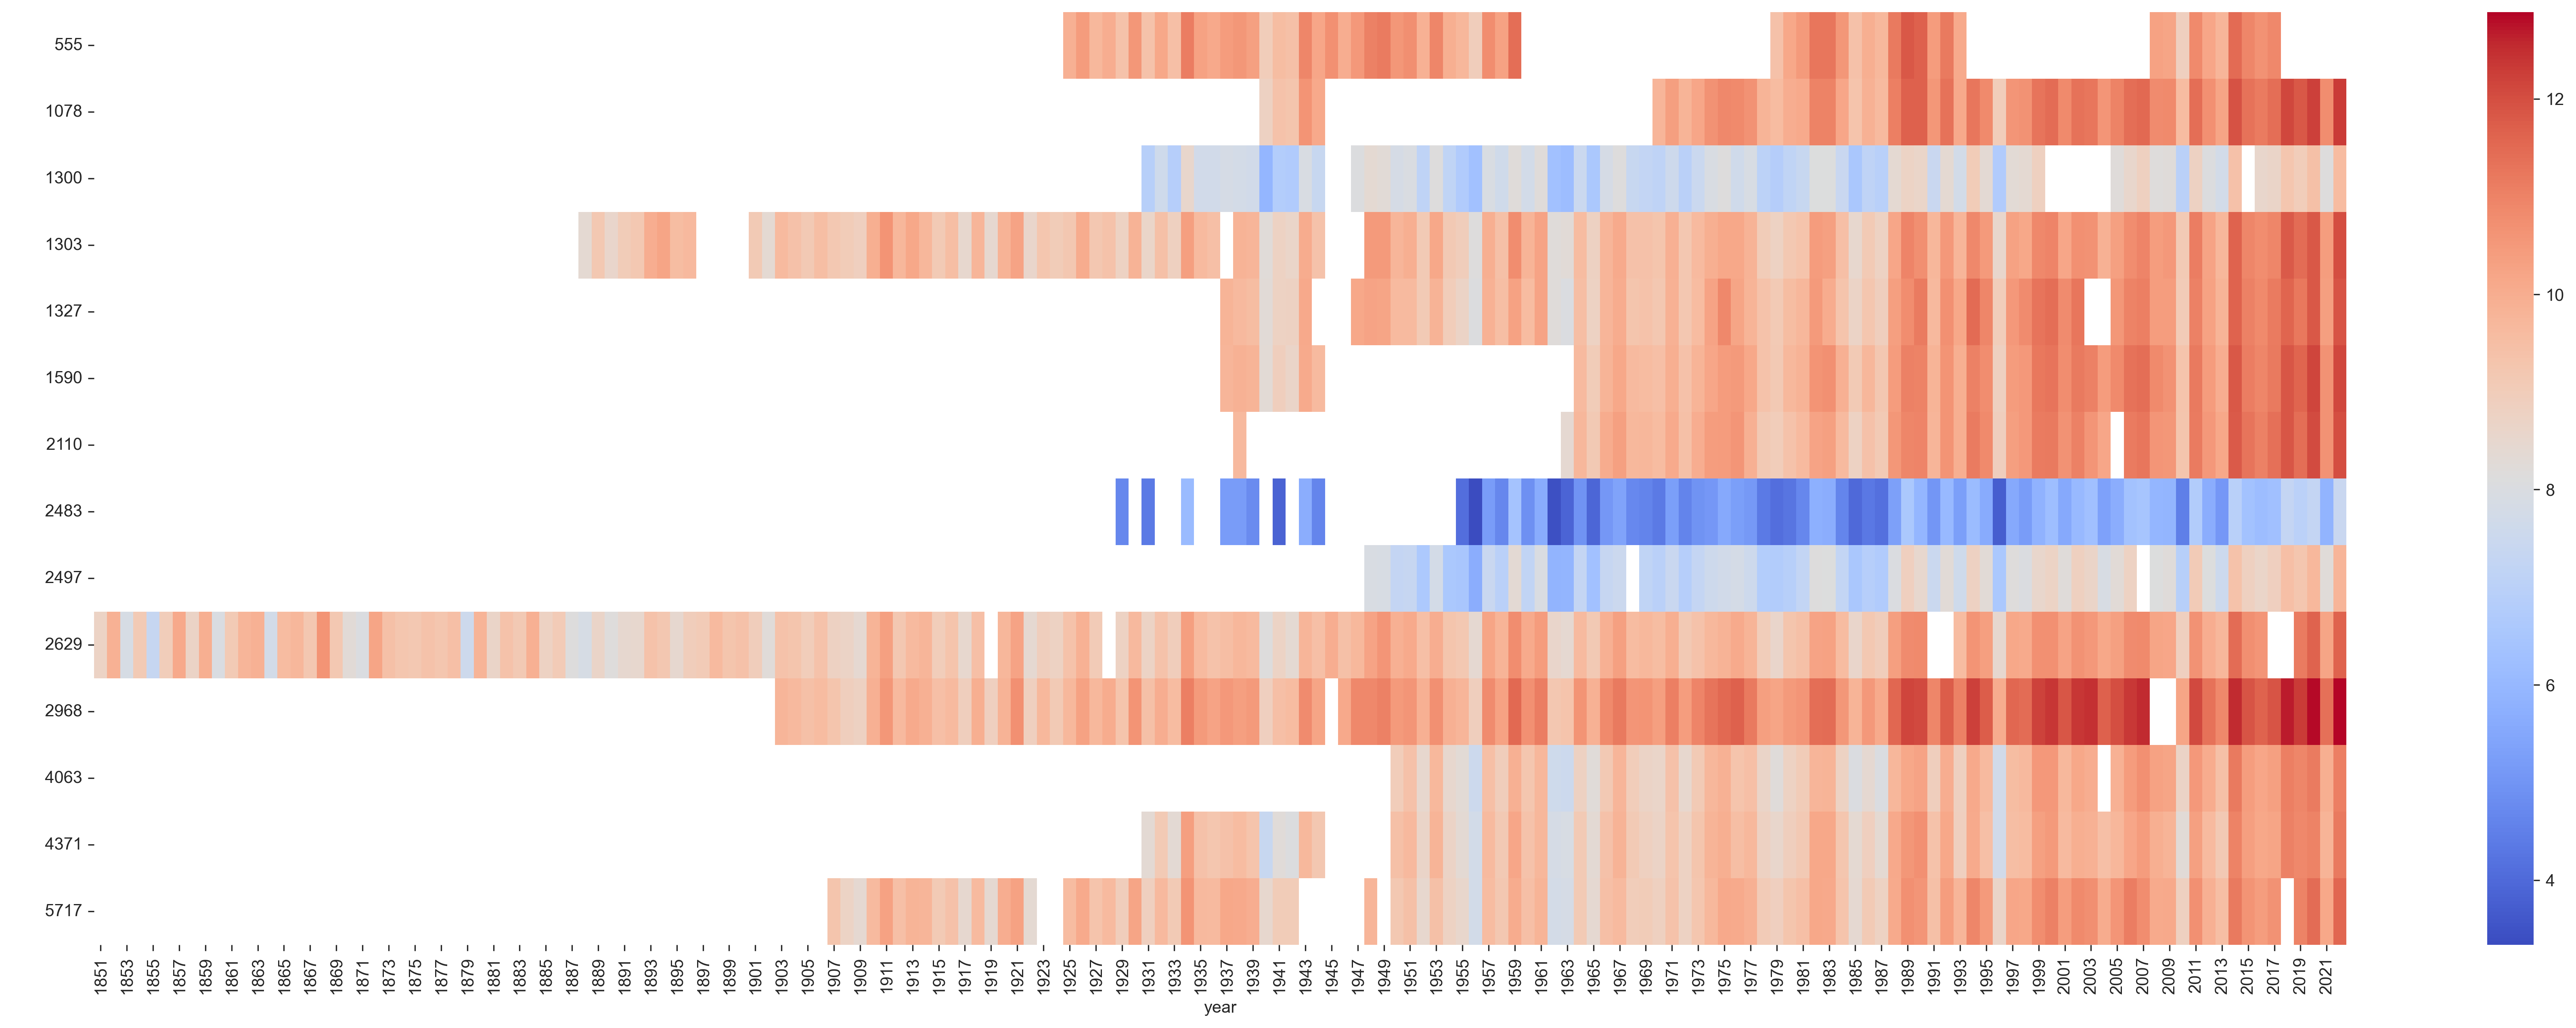

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot
sns.set_style('ticks')
fig1, ax1 = plt.subplots(dpi = 300, figsize = (30,10))

sns.heatmap(df_temp.T, cmap='coolwarm', ax = ax1)
fig1.savefig('NRW_Annual_Temp_Stripes_01.png')

# Exercise
The resolution of the plot above is not optimal. Only one station started getting data from 1851. Remember that you applied a filter to the list of the stations, so it makes sense to only display data within that window of dates.
1) generate a new plot displaying only the measurements from 1950

In [30]:
# plot


# Exercise:
Good! now have a look at the temperature values. Some stations have very cool temperatures all over the series. We can assume that it is an effect of the geographic location, maybe the colder stations are placed at higher altitudes. You can investigate that by looking at your data.

In [31]:
df_stations_short.filter(like="Stations")  #like se usa para todas las cosas que tengan =() en sus palabras

""
114
220
265
266
267
319
394
463
468
492


We are actually interested at the changes in temperature relative to the mean historical measurements.
By plotting the temperatures differences a blue tone means a measurement below the average of that stations and a red tone means that the measurement was above the average of the station

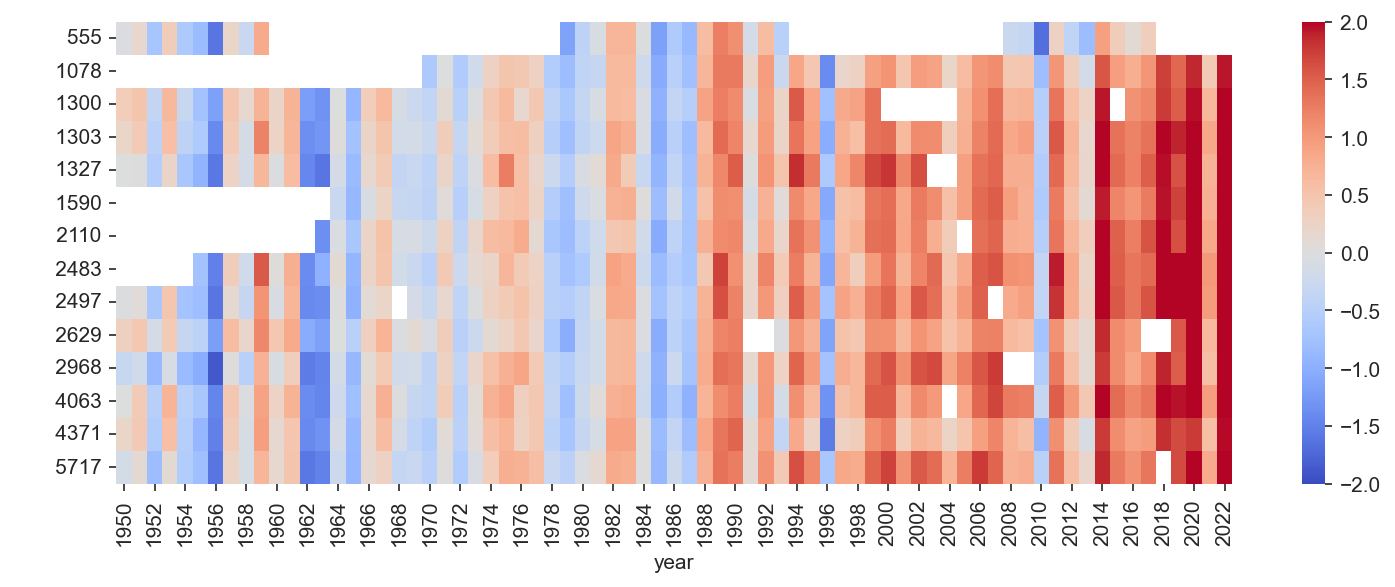

In [32]:
# 
sns.set_style('ticks')
fig3, ax3 = plt.subplots(dpi = 150, figsize = (12,4))

sns.heatmap(df_temp_diff[df_temp_diff.index >= 1950].T, cmap='coolwarm', vmin = -2, vmax = 2, ax = ax3)
fig3.savefig('NRW_Annual_Temp_Diff_Stripes_02.png')

# Question:

- Which tendency can you see in the temperature according the plot above?
- Why does station 555 display a different tendency than the other stations?